In [ ]:
!git clone https://github.com/jubcos/meyve.git

Cloning into 'meyve'...
remote: Enumerating objects: 6048, done.
remote: Counting objects: 100% (1222/1222), done.
remote: Compressing objects: 100% (1218/1218), done.
remote: Total 6048 (delta 2), reused 1220 (delta 0), pack-reused 4826
Receiving objects: 100% (6048/6048), 108.91 MiB | 37.36 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation


In [ ]:
train_path = "/content/meyve/fruits-360_dataset/fruits-360/Training"
test_path = "/content/meyve/fruits-360_dataset/fruits-360/Test"

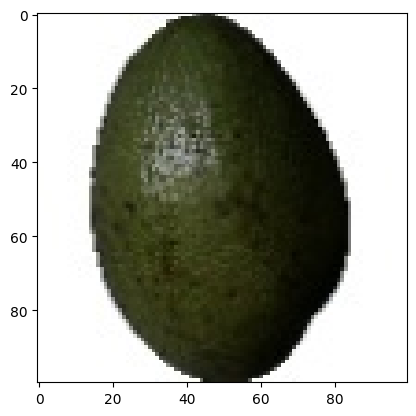

In [ ]:
img = load_img(train_path + "/Avocado/101_100.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

In [ ]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [ ]:
import os
def count_items_in_folder(folder_path):
    count = 0
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)

        if os.path.isfile(item_path) or os.path.isdir(item_path):
            count += 1
    return count

In [ ]:
model = Sequential()
model.add(Conv2D(64, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(count_items_in_folder(train_path), activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 flatten (Flatten)           (None, 16928)             0

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="SGD", metrics = ["accuracy"])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

b_size = 8
c_mode = 'rgb'

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = b_size,
                                                    color_mode= c_mode,
                                                    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = b_size,
                                                    color_mode= c_mode,
                                                    class_mode = "categorical")

Found 3116 images belonging to 6 classes.
Found 1038 images belonging to 6 classes.


In [ ]:
print(len(train_generator))

390


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // b_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator) // b_size,
    callbacks = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
)

Epoch 1/5
48/48 [==============================] - 15s 266ms/step - loss: 1.5834 - accuracy: 0.3411 - val_loss: 1.2199 - val_accuracy: 0.5391
Epoch 2/5
48/48 [==============================] - 7s 151ms/step - loss: 1.0650 - accuracy: 0.5495 - val_loss: 0.7787 - val_accuracy: 0.7656
Epoch 3/5
48/48 [==============================] - 6s 134ms/step - loss: 0.7318 - accuracy: 0.6895 - val_loss: 0.4421 - val_accuracy: 0.9141
Epoch 4/5
48/48 [==============================] - 7s 138ms/step - loss: 0.6327 - accuracy: 0.7500 - val_loss: 0.2180 - val_accuracy: 0.9844
Epoch 5/5
48/48 [==============================] - 7s 145ms/step - loss: 0.4362 - accuracy: 0.8474 - val_loss: 0.1110 - val_accuracy: 1.0000


In [ ]:
model.save("Fruitmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


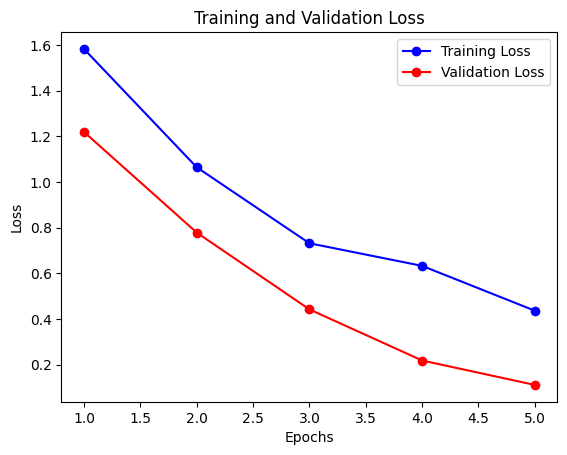

In [ ]:

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 1038 images belonging to 6 classes.
130/130 [==============================] - 4s 29ms/step
                precision    recall  f1-score   support

Apple Braeburn       1.00      1.00      1.00       164
       Avocado       1.00      1.00      1.00       143
Cherry Wax Red       1.00      1.00      1.00       164
          Pear       1.00      1.00      1.00       164
        Tomato       1.00      1.00      1.00       246
    Watermelon       1.00      1.00      1.00       157

      accuracy                           1.00      1038
     macro avg       1.00      1.00      1.00      1038
  weighted avg       1.00      1.00      1.00      1038

[[164   0   0   0   0   0]
 [  0 143   0   0   0   0]
 [  0   0 164   0   0   0]
 [  0   0   0 164   0   0]
 [  0   0   0   0 246   0]
 [  0   0   0   0   0 157]]


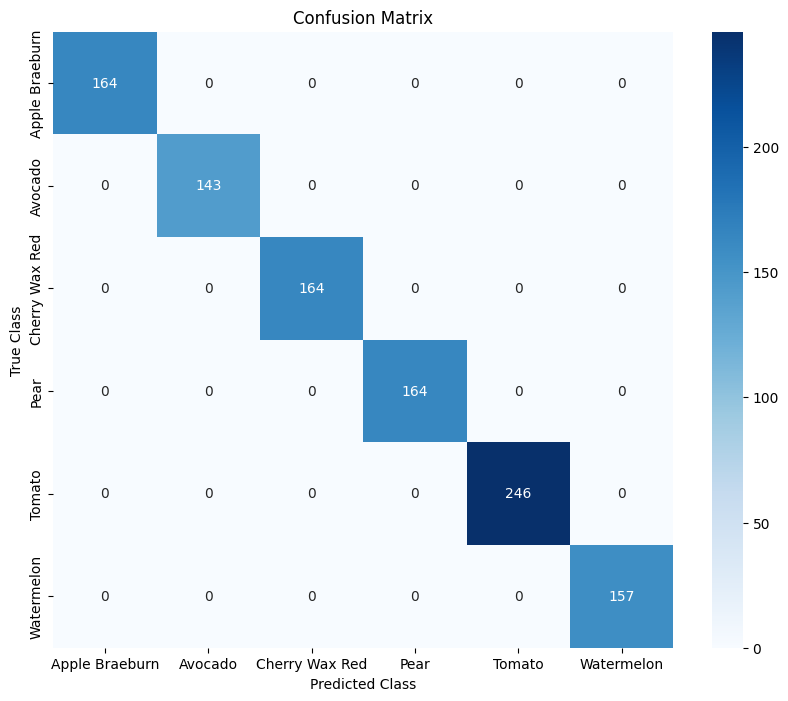

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

model = load_model('/content/Fruitmodel.h5')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(100, 100),
    batch_size=b_size,
    class_mode='categorical',
    shuffle=False
)

y_true = test_generator.classes
y_true = test_generator.classes

y_pred_prob = model.predict(test_generator)
y_pred = y_pred_prob.argmax(axis=-1)

conf_matrix = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

print("==========================")
print(conf_matrix)
print("==========================")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_generator.class_indices.keys()), yticklabels=list(test_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

1/1 [==============================] - 0s 63ms/step
Predicted class: avocado


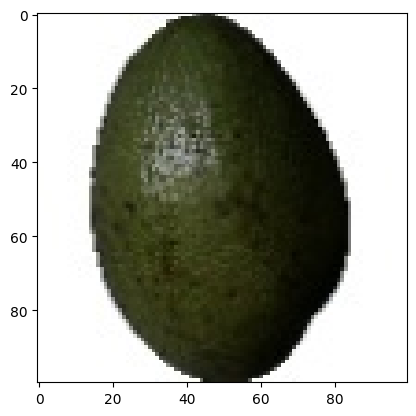

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load the saved .h5 model
model_path = '/content/Fruitmodel.h5'
model = tf.keras.models.load_model(model_path)

# Load and preprocess an image for prediction
image_path = train_path + "/Avocado/101_100.jpg"
img = image.load_img(image_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Map predictions to class labels
class_labels = ["apple", "avocado", "cherry", "pear"]
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print(f"Predicted class: {predicted_class_label}")

# Display the image
img = image.load_img(image_path)
plt.imshow(img)
plt.show()
